In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plt20182fillsplt-2018data/Data_Scaler_20180510.csv
/kaggle/input/plt20182fillsplt-2018data/notes.txt
/kaggle/input/plt20182fillsplt-2018data/Data_Scaler_20181127.csv


In [14]:
# Data loading and pre-processing:
data_dir = '/afs/cern.ch/user/m/mrapelli/private/filldata'
#merged_data = pd.DataFrame()

for filename in sorted(os.listdir(data_dir), reverse=True):
    if not filename.startswith("Data_Scaler"): continue
    print(filename)
    dataset = pd.read_csv(os.path.join(data_dir, filename), sep=',')
    dataset = dataset.drop(columns=['ms','orb','d0','d1','d2','xs','dc01','dc02','dc12','ldc01','ldc02','ldc12'])
    print (dataset.shape)
    dataset.columns = [filename[:19],'Timestamp','Ch', 's0', 's1', 's2']
    dataset = dataset.set_index('Timestamp')
    dataset.index = pd.DatetimeIndex(dataset.index).round(freq='1s')
    #dataset.index = pd.to_datetime(dataset.index)
    #dataset.columns[1] = pd.datetime.strptime(dataset.columns[1], "%X")
    print(dataset.head())    
    #print(dataset.index)
    print(dataset.index.shape)
    #print(type(dataset))    

Data_Scaler_20181127.csv
(649568, 6)
                           Data_Scaler_2018112  Ch  s0  s1  s2
Timestamp                                                     
2018-11-27 22:50:15+00:00                    0   0   0  24  26
2018-11-27 22:50:15+00:00                    1   1  57  39  41
2018-11-27 22:50:15+00:00                    2   2  45  36  32
2018-11-27 22:50:15+00:00                    3   3  19  12  22
2018-11-27 22:50:15+00:00                    4   4   8  18   0
(649568,)
Data_Scaler_20180510.csv
(1065584, 6)
                           Data_Scaler_2018051  Ch  s0  s1  s2
Timestamp                                                     
2018-05-10 20:54:19+00:00                    0   0   0   0   0
2018-05-10 20:54:19+00:00                    1   1   0   0   0
2018-05-10 20:54:19+00:00                    2   2   0   0   0
2018-05-10 20:54:19+00:00                    3   3   0   0   0
2018-05-10 20:54:19+00:00                    4   4   0   0   0
(1065584,)


In [54]:
# Data loading and pre-processing:
dataset_train = pd.read_csv(os.path.join(data_dir, 'Data_Scaler_20180510.csv'), sep=',',infer_datetime_format=True)
dataset_train = dataset_train.drop(columns=['ms','orb','d0','d1','d2','xs','dc01','dc02','dc12','ldc01','ldc02','ldc12'])
dataset_train.columns = [filename[:19],'Timestamp','Ch', 's0', 's1', 's2']
dataset_train = dataset_train.set_index('Timestamp')
#dataset.index = pd.to_datetime(dataset.index)
dataset_train.index = pd.DatetimeIndex(dataset_train.index).round(freq='1s')#.round(freq='ms')
print(dataset_train.head())
    
dataset_test = pd.read_csv(os.path.join(data_dir, 'Data_Scaler_20181127.csv'), sep=',',infer_datetime_format=True)
dataset_test = dataset_test.drop(columns=['ms','orb','d0','d1','d2','xs','dc01','dc02','dc12','ldc01','ldc02','ldc12'])
dataset_test.columns = [filename[:19],'Timestamp','Ch', 's0', 's1', 's2']
dataset_test = dataset_test.set_index('Timestamp')
#dataset.index = pd.to_datetime(dataset.index)
dataset_test.index = pd.DatetimeIndex(dataset_test.index).round(freq='1s')
print(dataset_test.head())

#dataset_train.plot(figsize = (12,6))

                           Data_Scaler_2018051  Ch  s0  s1  s2
Timestamp                                                     
2018-05-10 20:54:19+00:00                    0   0   0   0   0
2018-05-10 20:54:19+00:00                    1   1   0   0   0
2018-05-10 20:54:19+00:00                    2   2   0   0   0
2018-05-10 20:54:19+00:00                    3   3   0   0   0
2018-05-10 20:54:19+00:00                    4   4   0   0   0
                           Data_Scaler_2018051  Ch  s0  s1  s2
Timestamp                                                     
2018-11-27 22:50:15+00:00                    0   0   0  24  26
2018-11-27 22:50:15+00:00                    1   1  57  39  41
2018-11-27 22:50:15+00:00                    2   2  45  36  32
2018-11-27 22:50:15+00:00                    3   3  19  12  22
2018-11-27 22:50:15+00:00                    4   4   8  18   0


In [55]:
# Data loading and pre-processing:
dataset_test = dataset_test.dropna()
dataset_train = dataset_train.dropna()
dataset_train[dataset_train.isna().any(axis=1)] 
dataset_test[dataset_test.isna().any(axis=1)] 
dataset_train = dataset_train.drop(dataset_train.columns[0], axis=1)
dataset_test = dataset_test.drop(dataset_test.columns[0], axis=1)
display(dataset_train)
display(dataset_test)

,Ch,s0,s1,s2
Timestamp,,,,
2018-05-10 20:54:19+00:00,0,0,0,0
2018-05-10 20:54:19+00:00,1,0,0,0
2018-05-10 20:54:19+00:00,2,0,0,0
2018-05-10 20:54:19+00:00,3,0,0,0
2018-05-10 20:54:19+00:00,4,0,0,0
...,...,...,...,...
2018-05-11 10:22:55+00:00,11,585,596,766
2018-05-11 10:22:55+00:00,12,582,634,708
2018-05-11 10:22:55+00:00,13,540,589,665


,Ch,s0,s1,s2
Timestamp,,,,
2018-11-27 22:50:15+00:00,0,0,24,26
2018-11-27 22:50:15+00:00,1,57,39,41
2018-11-27 22:50:15+00:00,2,45,36,32
2018-11-27 22:50:15+00:00,3,19,12,22
2018-11-27 22:50:15+00:00,4,8,18,0
...,...,...,...,...
2018-11-28 07:03:41+00:00,11,0,17,19
2018-11-28 07:03:41+00:00,12,12,18,12
2018-11-28 07:03:41+00:00,13,11,14,13


In [125]:
#Concatenating all channels, training data
result0 = dataset_train.loc[dataset_train['Ch'] == 0]
result0.columns = ['Ch','s0_0', 's1_0', 's2_0']
result1 = dataset_train.loc[dataset_train['Ch'] == 1]
result1.columns = ['Ch','s0_1', 's1_1', 's2_1']
result2 = dataset_train.loc[dataset_train['Ch'] == 2]
result2.columns = ['Ch','s0_2', 's1_2', 's2_2']
result3 = dataset_train.loc[dataset_train['Ch'] == 3]
result3.columns = ['Ch','s0_3', 's1_3', 's2_3']
result4 = dataset_train.loc[dataset_train['Ch'] == 4]
result4.columns = ['Ch','s0_4', 's1_4', 's2_4']
result5 = dataset_train.loc[dataset_train['Ch'] == 5]
result5.columns = ['Ch','s0_5', 's1_5', 's2_5']
result6 = dataset_train.loc[dataset_train['Ch'] == 6]
result6.columns = ['Ch','s0_6', 's1_6', 's2_6']
result7 = dataset_train.loc[dataset_train['Ch'] == 7]
result7.columns = ['Ch','s0_7', 's1_7', 's2_7']
result8 = dataset_train.loc[dataset_train['Ch'] == 8]
result8.columns = ['Ch','s0_8', 's1_8', 's2_8']
result9 = dataset_train.loc[dataset_train['Ch'] == 9]
result9.columns = ['Ch','s0_9', 's1_9', 's2_9']
result10 = dataset_train.loc[dataset_train['Ch'] == 10]
result10.columns = ['Ch','s0_10', 's1_10', 's2_10']
result11 = dataset_train.loc[dataset_train['Ch'] == 11]
result11.columns = ['Ch','s0_11', 's1_11', 's2_11']
result12 = dataset_train.loc[dataset_train['Ch'] == 12]
result12.columns = ['Ch','s0_12', 's1_12', 's2_12']
result13 = dataset_train.loc[dataset_train['Ch'] == 13]
result13.columns = ['Ch','s0_13', 's1_13', 's2_13']
result14 = dataset_train.loc[dataset_train['Ch'] == 14]
result14.columns = ['Ch','s0_14', 's1_14', 's2_14']
result15 = dataset_train.loc[dataset_train['Ch'] == 15]
result15.columns = ['Ch','s0_15', 's1_15', 's2_15']
df = pd.concat([result0, result1, result2, result3, result4, result5, result6, result7, result8, result9, result10, result11, result12, result13, result14, result15], axis=1)
df=  df.drop(df[['Ch']], axis=1)
display(df)

,s0_0,s1_0,s2_0,s0_1,s1_1,s2_1,s0_2,s1_2,s2_2,s0_3,...,s2_12,s0_13,s1_13,s2_13,s0_14,s1_14,s2_14,s0_15,s1_15,s2_15
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-05-10 20:54:19+00:00,0,0,0,0,0,0,0,0,0,0,...,627,574,593,623,469,440,530,435,412,459
2018-05-10 20:54:20+00:00,2,595,715,927,837,897,823,703,794,472,...,633,617,580,632,487,457,588,422,454,469
2018-05-10 20:54:21+00:00,3,627,746,1016,888,900,786,714,794,451,...,600,573,594,600,491,541,564,440,432,473
2018-05-10 20:54:22+00:00,1,646,731,935,882,929,811,735,842,468,...,642,649,638,627,482,473,530,412,467,439
2018-05-10 20:54:22+00:00,1,669,776,1018,868,930,779,749,840,445,...,598,598,603,679,485,502,523,401,470,472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-11 10:22:52+00:00,0,658,768,626,627,694,642,584,700,538,...,773,607,611,632,564,614,675,612,617,615
2018-05-11 10:22:52+00:00,0,633,703,647,664,706,557,556,667,516,...,739,564,622,669,521,535,670,542,618,663
2018-05-11 10:22:53+00:00,2,608,767,565,612,661,593,554,681,482,...,709,580,605,616,562,505,619,494,615,611


In [128]:
#Concatenating all channels, test data
result0 = dataset_test.loc[dataset_test['Ch'] == 0]
result0.columns = ['Ch','s0_0', 's1_0', 's2_0']
result1 = dataset_test.loc[dataset_test['Ch'] == 1]
result1.columns = ['Ch','s0_1', 's1_1', 's2_1']
result2 = dataset_test.loc[dataset_test['Ch'] == 2]
result2.columns = ['Ch','s0_2', 's1_2', 's2_2']
result3 = dataset_test.loc[dataset_test['Ch'] == 3]
result3.columns = ['Ch','s0_3', 's1_3', 's2_3']
result4 = dataset_test.loc[dataset_test['Ch'] == 4]
result4.columns = ['Ch','s0_4', 's1_4', 's2_4']
result5 = dataset_test.loc[dataset_test['Ch'] == 5]
result5.columns = ['Ch','s0_5', 's1_5', 's2_5']
result6 = dataset_test.loc[dataset_test['Ch'] == 6]
result6.columns = ['Ch','s0_6', 's1_6', 's2_6']
result7 = dataset_test.loc[dataset_test['Ch'] == 7]
result7.columns = ['Ch','s0_7', 's1_7', 's2_7']
result8 = dataset_test.loc[dataset_test['Ch'] == 8]
result8.columns = ['Ch','s0_8', 's1_8', 's2_8']
result9 = dataset_test.loc[dataset_test['Ch'] == 9]
result9.columns = ['Ch','s0_9', 's1_9', 's2_9']
result10 = dataset_test.loc[dataset_test['Ch'] == 10]
result10.columns = ['Ch','s0_10', 's1_10', 's2_10']
result11 = dataset_test.loc[dataset_test['Ch'] == 11]
result11.columns = ['Ch','s0_11', 's1_11', 's2_11']
result12 = dataset_test.loc[dataset_test['Ch'] == 12]
result12.columns = ['Ch','s0_12', 's1_12', 's2_12']
result13 = dataset_test.loc[dataset_test['Ch'] == 13]
result13.columns = ['Ch','s0_13', 's1_13', 's2_13']
result14 = dataset_test.loc[dataset_test['Ch'] == 14]
result14.columns = ['Ch','s0_14', 's1_14', 's2_14']
result15 = dataset_test.loc[dataset_test['Ch'] == 15]
result15.columns = ['Ch','s0_15', 's1_15', 's2_15']
df1 = pd.concat([result0, result1, result2, result3, result4, result5, result6, result7, result8, result9, result10, result11, result12, result13, result14, result15], axis=1)
df1 =  df1.drop(df1[['Ch']], axis=1)
display(df1)

,s0_0,s1_0,s2_0,s0_1,s1_1,s2_1,s0_2,s1_2,s2_2,s0_3,...,s2_12,s0_13,s1_13,s2_13,s0_14,s1_14,s2_14,s0_15,s1_15,s2_15
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-11-27 22:50:15+00:00,0,24,26,57,39,41,45,36,32,19,...,21,18,22,27,26,31,32,11,24,24
2018-11-27 22:50:15+00:00,0,23,27,47,41,42,44,42,37,16,...,25,30,23,24,22,23,15,7,26,22
2018-11-27 22:50:16+00:00,2,27,32,59,62,58,46,41,48,29,...,28,27,30,37,26,18,16,33,31,29
2018-11-27 22:50:17+00:00,0,21,28,47,61,47,35,37,42,24,...,34,19,27,23,17,15,22,18,22,28
2018-11-27 22:50:18+00:00,1,31,21,62,49,47,45,40,53,19,...,29,33,32,32,25,38,31,19,26,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-28 07:03:38+00:00,0,174,17,11,18,17,14,14,9,17,...,13,10,18,17,24,12,22,18,18,27
2018-11-28 07:03:38+00:00,0,169,17,14,14,25,9,13,12,19,...,17,14,16,20,17,18,13,16,18,22
2018-11-28 07:03:39+00:00,0,167,18,14,25,13,11,19,15,18,...,17,15,24,19,26,7,17,15,28,22


In [136]:
X_train = df
X_test = df1

In [155]:
# Normalize data
from sklearn import preprocessing


scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), 
                              columns=X_train.columns, 
                              index=X_train.index)
# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(X_test), 
                             columns=X_test.columns, 
                             index=X_test.index)

In [141]:
display(X_train)
display(X_test)
column = X_train["s0_0"]
max_value = column.max()
print(max_value)

,s0_0,s1_0,s2_0,s0_1,s1_1,s2_1,s0_2,s1_2,s2_2,s0_3,...,s2_12,s0_13,s1_13,s2_13,s0_14,s1_14,s2_14,s0_15,s1_15,s2_15
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-05-10 20:54:19+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000022,9.014179e-06,0.000022,0.000024,0.000015,0.000010,0.000014,0.000019,0.000008,0.000014
2018-05-10 20:54:20+00:00,0.000159,0.000151,0.000163,0.000219,0.000218,0.000213,0.000206,0.000198,0.000199,0.000172,...,0.000023,2.008874e-05,0.000018,0.000026,0.000020,0.000015,0.000029,0.000015,0.000020,0.000017
2018-05-10 20:54:21+00:00,0.000238,0.000159,0.000170,0.000240,0.000231,0.000214,0.000197,0.000201,0.000199,0.000164,...,0.000015,8.756631e-06,0.000022,0.000018,0.000021,0.000040,0.000023,0.000020,0.000014,0.000018
2018-05-10 20:54:22+00:00,0.000079,0.000164,0.000166,0.000221,0.000229,0.000220,0.000203,0.000207,0.000211,0.000170,...,0.000025,2.833028e-05,0.000035,0.000025,0.000018,0.000020,0.000014,0.000012,0.000024,0.000009
2018-05-10 20:54:22+00:00,0.000079,0.000170,0.000176,0.000240,0.000226,0.000221,0.000195,0.000210,0.000211,0.000162,...,0.000015,1.519533e-05,0.000025,0.000038,0.000019,0.000029,0.000012,0.000009,0.000025,0.000018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-11 10:22:52+00:00,0.000000,0.000167,0.000175,0.000148,0.000163,0.000165,0.000161,0.000164,0.000175,0.000196,...,0.000057,1.751326e-05,0.000027,0.000026,0.000041,0.000063,0.000052,0.000067,0.000069,0.000059
2018-05-11 10:22:52+00:00,0.000000,0.000161,0.000160,0.000153,0.000173,0.000168,0.000139,0.000156,0.000167,0.000188,...,0.000049,6.438699e-06,0.000030,0.000036,0.000029,0.000039,0.000051,0.000048,0.000070,0.000073
2018-05-11 10:22:53+00:00,0.000159,0.000154,0.000174,0.000133,0.000159,0.000157,0.000148,0.000156,0.000171,0.000175,...,0.000041,1.055947e-05,0.000025,0.000022,0.000040,0.000029,0.000037,0.000035,0.000069,0.000058


,s0_0,s1_0,s2_0,s0_1,s1_1,s2_1,s0_2,s1_2,s2_2,s0_3,...,s2_12,s0_13,s1_13,s2_13,s0_14,s1_14,s2_14,s0_15,s1_15,s2_15
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-11-27 22:50:15+00:00,0.000000,0.000006,0.000006,0.000013,0.000010,0.000010,0.000011,0.000010,0.000008,0.000007,...,-0.000125,-0.000134,-0.000141,-0.000127,-0.000105,-0.000115,-0.000118,-0.000099,-0.000109,-0.000111
2018-11-27 22:50:15+00:00,0.000000,0.000006,0.000006,0.000011,0.000011,0.000010,0.000011,0.000012,0.000009,0.000006,...,-0.000124,-0.000131,-0.000140,-0.000128,-0.000106,-0.000117,-0.000123,-0.000100,-0.000108,-0.000112
2018-11-27 22:50:16+00:00,0.000159,0.000007,0.000007,0.000014,0.000016,0.000014,0.000012,0.000012,0.000012,0.000011,...,-0.000124,-0.000132,-0.000138,-0.000125,-0.000105,-0.000119,-0.000122,-0.000093,-0.000107,-0.000110
2018-11-27 22:50:17+00:00,0.000000,0.000005,0.000006,0.000011,0.000016,0.000011,0.000009,0.000010,0.000011,0.000009,...,-0.000122,-0.000134,-0.000139,-0.000128,-0.000108,-0.000119,-0.000121,-0.000097,-0.000109,-0.000110
2018-11-27 22:50:18+00:00,0.000079,0.000008,0.000005,0.000015,0.000013,0.000011,0.000011,0.000011,0.000013,0.000007,...,-0.000123,-0.000130,-0.000138,-0.000126,-0.000105,-0.000112,-0.000119,-0.000096,-0.000108,-0.000110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-28 07:03:38+00:00,0.000000,0.000044,0.000004,0.000003,0.000005,0.000004,0.000004,0.000004,0.000002,0.000006,...,-0.000127,-0.000136,-0.000142,-0.000130,-0.000106,-0.000120,-0.000121,-0.000097,-0.000110,-0.000110
2018-11-28 07:03:38+00:00,0.000000,0.000043,0.000004,0.000003,0.000004,0.000006,0.000002,0.000004,0.000003,0.000007,...,-0.000126,-0.000135,-0.000142,-0.000129,-0.000108,-0.000119,-0.000123,-0.000097,-0.000110,-0.000112
2018-11-28 07:03:39+00:00,0.000000,0.000042,0.000004,0.000003,0.000006,0.000003,0.000003,0.000005,0.000004,0.000007,...,-0.000126,-0.000135,-0.000140,-0.000129,-0.000105,-0.000122,-0.000122,-0.000097,-0.000107,-0.000112


1.0


In [ ]:
#numcomponents = 2
numcomponents = 2

In [143]:
# Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components= numcomponents, svd_solver= 'full') #fromscreeplot
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = X_train.index

X_test_PCA = pca.transform(X_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = X_test.index

In [ ]:
display(X_train_PCA)
Xt = X_train_PCA
np.shape(X_train_PCA)

In [ ]:
import matplotlib.pyplot as plt
plot = plt.scatter(Xt.iloc[:,0], Xt.iloc[:,1], alpha=0.2, cmap=plt.cm.get_cmap('summer', 10))      #, Xt.iloc[:,2])
plt.show()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components after scaling")
plt.savefig("PCA/pca_plots")
plt.close() 

In [ ]:
pca.explained_variance_

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("ggplot") 
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")
plt.savefig("PCA/PCA_analysis.png")
plt.close()  


In [144]:
#ReconstructionfromPCA
X_new = pca.inverse_transform (X_train_PCA)
df = pd.DataFrame(X_new)
display(X_train)
df['Timestamp'] = X_train.index
df.set_index('Timestamp', inplace= True)
display(df)
#df1=(df.drop(columns='Ch', axis=1))
#df.plot()
#df2=(X_train.drop(X_train.columns[[0]], axis=1))
#X_train.plot()

,s0_0,s1_0,s2_0,s0_1,s1_1,s2_1,s0_2,s1_2,s2_2,s0_3,...,s2_12,s0_13,s1_13,s2_13,s0_14,s1_14,s2_14,s0_15,s1_15,s2_15
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-05-10 20:54:19+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000022,9.014179e-06,0.000022,0.000024,0.000015,0.000010,0.000014,0.000019,0.000008,0.000014
2018-05-10 20:54:20+00:00,0.000159,0.000151,0.000163,0.000219,0.000218,0.000213,0.000206,0.000198,0.000199,0.000172,...,0.000023,2.008874e-05,0.000018,0.000026,0.000020,0.000015,0.000029,0.000015,0.000020,0.000017
2018-05-10 20:54:21+00:00,0.000238,0.000159,0.000170,0.000240,0.000231,0.000214,0.000197,0.000201,0.000199,0.000164,...,0.000015,8.756631e-06,0.000022,0.000018,0.000021,0.000040,0.000023,0.000020,0.000014,0.000018
2018-05-10 20:54:22+00:00,0.000079,0.000164,0.000166,0.000221,0.000229,0.000220,0.000203,0.000207,0.000211,0.000170,...,0.000025,2.833028e-05,0.000035,0.000025,0.000018,0.000020,0.000014,0.000012,0.000024,0.000009
2018-05-10 20:54:22+00:00,0.000079,0.000170,0.000176,0.000240,0.000226,0.000221,0.000195,0.000210,0.000211,0.000162,...,0.000015,1.519533e-05,0.000025,0.000038,0.000019,0.000029,0.000012,0.000009,0.000025,0.000018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-11 10:22:52+00:00,0.000000,0.000167,0.000175,0.000148,0.000163,0.000165,0.000161,0.000164,0.000175,0.000196,...,0.000057,1.751326e-05,0.000027,0.000026,0.000041,0.000063,0.000052,0.000067,0.000069,0.000059
2018-05-11 10:22:52+00:00,0.000000,0.000161,0.000160,0.000153,0.000173,0.000168,0.000139,0.000156,0.000167,0.000188,...,0.000049,6.438699e-06,0.000030,0.000036,0.000029,0.000039,0.000051,0.000048,0.000070,0.000073
2018-05-11 10:22:53+00:00,0.000159,0.000154,0.000174,0.000133,0.000159,0.000157,0.000148,0.000156,0.000171,0.000175,...,0.000041,1.055947e-05,0.000025,0.000022,0.000040,0.000029,0.000037,0.000035,0.000069,0.000058


,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-05-10 20:54:19+00:00,-4.685141e-14,1.709743e-14,5.551115e-15,2.786660e-14,-1.221245e-15,1.598721e-14,7.771561e-15,1.620926e-14,2.997602e-15,1.421085e-14,...,0.000022,9.014179e-06,0.000022,0.000024,0.000015,0.000010,0.000014,0.000019,0.000008,0.000014
2018-05-10 20:54:20+00:00,1.587176e-04,1.511747e-04,1.625708e-04,2.189016e-04,2.175182e-04,2.128730e-04,2.058252e-04,1.975645e-04,1.990643e-04,1.717127e-04,...,0.000023,2.008874e-05,0.000018,0.000026,0.000020,0.000015,0.000029,0.000015,0.000020,0.000017
2018-05-10 20:54:21+00:00,2.380763e-04,1.593051e-04,1.696194e-04,2.399181e-04,2.307720e-04,2.135850e-04,1.965718e-04,2.006559e-04,1.990643e-04,1.640730e-04,...,0.000015,8.756631e-06,0.000022,0.000018,0.000021,0.000040,0.000023,0.000020,0.000014,0.000018
2018-05-10 20:54:22+00:00,7.935878e-05,1.641326e-04,1.662088e-04,2.207907e-04,2.292127e-04,2.204671e-04,2.028241e-04,2.065575e-04,2.110985e-04,1.702575e-04,...,0.000025,2.833028e-05,0.000035,0.000025,0.000018,0.000020,0.000014,0.000012,0.000024,0.000009
2018-05-10 20:54:22+00:00,7.935878e-05,1.699763e-04,1.764405e-04,2.403903e-04,2.255744e-04,2.207045e-04,1.948212e-04,2.104919e-04,2.105970e-04,1.618902e-04,...,0.000015,1.519533e-05,0.000025,0.000038,0.000019,0.000029,0.000012,0.000009,0.000025,0.000018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-11 10:22:52+00:00,-4.413137e-14,1.671815e-04,1.746215e-04,1.478235e-04,1.629437e-04,1.646977e-04,1.605586e-04,1.641219e-04,1.754975e-04,1.957234e-04,...,0.000057,1.751326e-05,0.000027,0.000026,0.000041,0.000063,0.000052,0.000067,0.000069,0.000059
2018-05-11 10:22:52+00:00,-4.429790e-14,1.608296e-04,1.598424e-04,1.527825e-04,1.725592e-04,1.675455e-04,1.393009e-04,1.562530e-04,1.672241e-04,1.877198e-04,...,0.000049,6.438699e-06,0.000030,0.000036,0.000029,0.000039,0.000051,0.000048,0.000070,0.000073
2018-05-11 10:22:53+00:00,1.587176e-04,1.544777e-04,1.743942e-04,1.334190e-04,1.590456e-04,1.568663e-04,1.483042e-04,1.556910e-04,1.707340e-04,1.753507e-04,...,0.000041,1.055947e-05,0.000025,0.000022,0.000040,0.000029,0.000037,0.000035,0.000069,0.000058


In [213]:
def cov_matrix(data, verbose=False):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            return covariance_matrix, inv_covariance_matrix
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")
    return covariance_matrix, inv_covariance_matrix

def MahalanobisDist(inv_cov_matrix, mean_distr, data, verbose=False):
    inv_covariance_matrix = inv_cov_matrix
    vars_mean = mean_distr
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
    return md

def EuclideanDist(data, mean_distr):
    dist = []
    for i in range(len(data)):
        dist.append(np.linalg.norm(data[i]-mean_distr))
    return dist

def CosineDist(data, mean_distr):
    dist = []
    mean = [mean_distr] * np.shape(data)[0]
    #dist = data*mean/(np.linalg.norm(data)*np.linalg.norm(mean))
    for i in range(len(data)):
        dist.append(np.dot(data[i],mean[i]))
    dist = dist /(np.linalg.norm(data)*np.linalg.norm(mean))
    return dist 

def ManhattanDist(data, mean_distr):
    dist = []
    for i in range(len(data)):
        dist.append(sum(abs(data[i]-mean_distr)))
    return dist

def MD_detectOutliers(dist, extreme=False, verbose=False, euclidean=False, cosine=False, manhattan=False):
    if extreme:
        k=3
    elif euclidean or cosine or manhattan:
        k=2
    else:
        k=2
    threshold = np.mean(dist) * k
    outliers = []
    for i in range(len(dist)):
        if dist[i] >= threshold:
            outliers.append(i)  # index of the outlier
    return np.array(outliers)

def MD_threshold(dist, extreme=False, euclidean=False, cosine=False, verbose=False, manhattan=False):
    if extreme:
        k=3
    elif euclidean or cosine or manhattan:
        k=2
    else:
        k=2
    threshold = np.mean(dist) * k
    return threshold

def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

In [161]:
# PCA model
data_train = np.array(X_train_PCA.values)
data_test = np.array(X_test_PCA.values)

cov_matrix, inv_cov_matrix  = cov_matrix(data_train)
mean_distr = data_train.mean(axis=0)

dist_test = MahalanobisDist(inv_cov_matrix, mean_distr, data_test, verbose=False)
dist_train = MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)
threshold = MD_threshold(dist_train, extreme = True)

<Figure size 432x288 with 0 Axes>

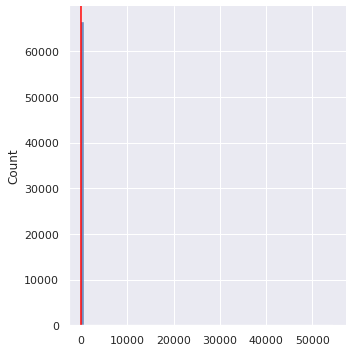

In [162]:
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
sns.displot(np.square(dist_train),
             bins = 100, 
             kde= False)
plt.axvline(x=threshold, color = 'red')
#plt.xlim([0.0,150])
plt.savefig("PCA/Mahalonobisdisttreshold_3.png")
plt.close() 

Text(0.5, 6.799999999999979, 'Mahalanobis dist')

<Figure size 432x288 with 0 Axes>

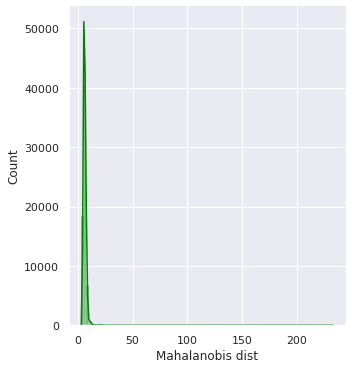

In [163]:
plt.figure()
sns.displot(dist_train,
             bins = 100, 
             kde= True, 
            color = 'green');
#plt.xlim([0.0,15])
#plt.yscale('log')
plt.xlabel('Mahalanobis dist')
#plt.axvline(x=threshold, color = 'red')
plt.savefig("PCA/Mahalonobisdisttraindistribution_3.png")
plt.close() 

Text(0.5, 6.799999999999979, 'Mahalanobis dist')

<Figure size 432x288 with 0 Axes>

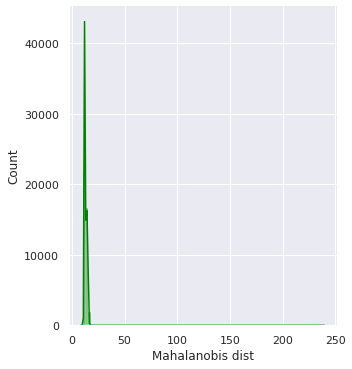

In [164]:
plt.figure()
sns.displot(dist_test,
             bins = 100, 
             kde= True, 
            color = 'green');
#plt.axvline(x=threshold, color = 'red')
#plt.xlim([0.0,15])
#plt.yscale('log')
plt.xlabel('Mahalanobis dist')
plt.savefig("PCA/Mahalonobisdisttestdistribution_3.png")
plt.close() 

In [165]:
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist']= dist_train
anomaly_train['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index
anomaly.head()

,Mob dist,Thresh,Anomaly
Timestamp,,,
2018-11-27 22:50:15+00:00,12.983122,18.912883,False
2018-11-27 22:50:15+00:00,12.819896,18.912883,False
2018-11-27 22:50:16+00:00,12.762629,18.912883,False
2018-11-27 22:50:17+00:00,12.777875,18.912883,False
2018-11-27 22:50:18+00:00,12.709266,18.912883,False


In [166]:
anomaly_alldata = pd.concat([anomaly_train, anomaly])
anomaly_alldata.to_csv('Anomaly_distance_Mahalanobis.csv')
#anomaly_alldata.plot(logy=True, figsize = (10,6), ylim = [1e-1,1e3], color = ['green','red'])

<AxesSubplot:xlabel='Timestamp'>

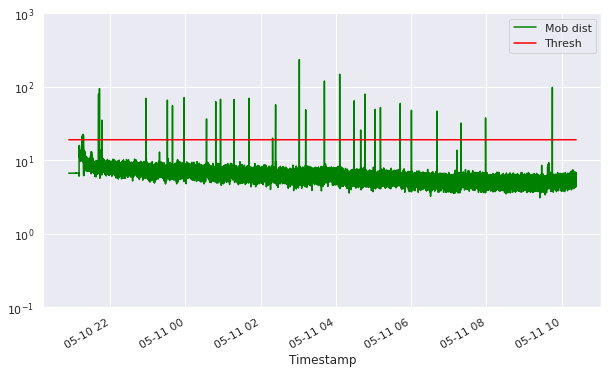

In [167]:
anomaly_train.plot(logy=True, figsize = (10,6), ylim = [1e-1,1e3], color = ['green','red'])
plt.savefig("PCA/Mahalonobisdisttrainanomaly_3.png")
plt.close() 

<AxesSubplot:xlabel='Timestamp'>

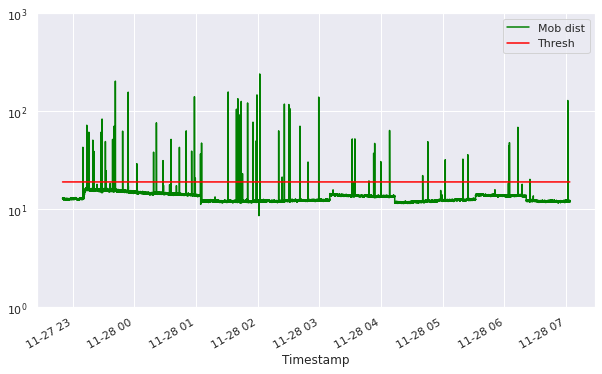

In [169]:
anomaly.plot(logy=True, figsize = (10,6), ylim = [1,1e3], color = ['green','red'])
plt.savefig("PCA/Mahalonobisdisttestanomaly_3.png")
plt.close() 

In [173]:
#PCA model with EuclideanDistance
dist_trainEucl = EuclideanDist (data_train, mean_distr)
dist_testEucl = EuclideanDist (data_test, mean_distr)
thresholdEucl = MD_threshold(dist_trainEucl, euclidean = True)
print(thresholdEucl)

2.1709141507481013


<Figure size 432x288 with 0 Axes>

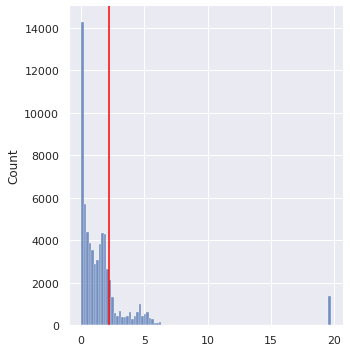

In [174]:
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
sns.displot(np.square(dist_trainEucl),
             bins = 100, 
             kde= False);
plt.axvline(x=thresholdEucl, color = 'red')
#plt.xlim([0.0,150])
plt.savefig("PCA/Euclideansdisttreshold_3.png")
plt.close() 

Text(0.5, 6.799999999999979, 'Euclidean dist')

<Figure size 432x288 with 0 Axes>

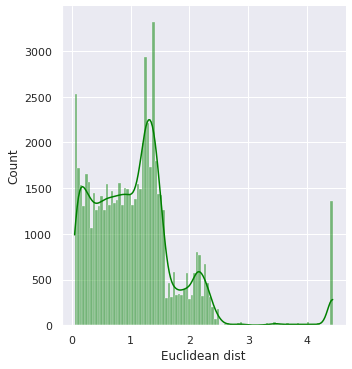

In [175]:
plt.figure()
sns.displot(dist_trainEucl,bins = 100, kde= True, color = 'green');
#plt.xlim([0.0,15])
#plt.yscale('log')
plt.xlabel('Euclidean dist')
#plt.axvline(x=thresholdEucl, color = 'red')
plt.savefig("PCA/Euclideandisttraindistribution_3.png")
plt.close() 

Text(0.5, 6.799999999999979, 'Euclidean dist')

<Figure size 432x288 with 0 Axes>

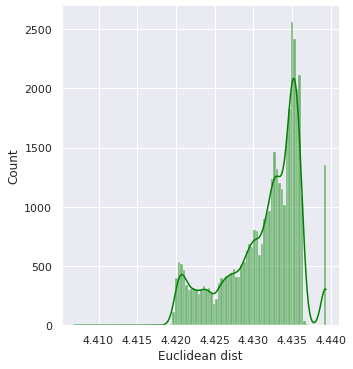

In [176]:
plt.figure()
sns.displot(dist_testEucl,bins = 100, kde= True, color = 'green');
#plt.xlim([0.0,15])
#plt.yscale('log')
plt.xlabel('Euclidean dist')
#plt.axvline(x=thresholdEucl, color = 'red')
plt.savefig("PCA/Euclideansdisttestdistribution_3.png")
plt.close() 

In [177]:
anomaly_train2 = pd.DataFrame()
anomaly_train2['Eucl dist']= dist_trainEucl
anomaly_train2['Thresh'] = thresholdEucl
# If Euclidean dist above threshold: Flag as anomaly
anomaly_train2['Anomaly'] = anomaly_train2['Eucl dist'] > anomaly_train2['Thresh']
anomaly_train2.index = X_train_PCA.index
anomaly2 = pd.DataFrame()
anomaly2['Eucl dist']= dist_testEucl
anomaly2['Thresh'] = thresholdEucl
# If Mob dist above threshold: Flag as anomaly
anomaly2['Anomaly'] = anomaly2['Eucl dist'] > anomaly2['Thresh']
anomaly2.index = X_test_PCA.index
anomaly2.head()

,Eucl dist,Thresh,Anomaly
Timestamp,,,
2018-11-27 22:50:15+00:00,4.439274,2.170914,True
2018-11-27 22:50:15+00:00,4.439291,2.170914,True
2018-11-27 22:50:16+00:00,4.439269,2.170914,True
2018-11-27 22:50:17+00:00,4.439286,2.170914,True
2018-11-27 22:50:18+00:00,4.439282,2.170914,True


In [178]:
anomaly_alldata2 = pd.concat([anomaly_train2, anomaly2])
anomaly_alldata2.to_csv('Anomaly_distanceEuclidean.csv')
#anomaly_alldata2.plot(logy=True, figsize = (10,6), ylim = [1e-4,1], color = ['green','red'])

<AxesSubplot:xlabel='Timestamp'>

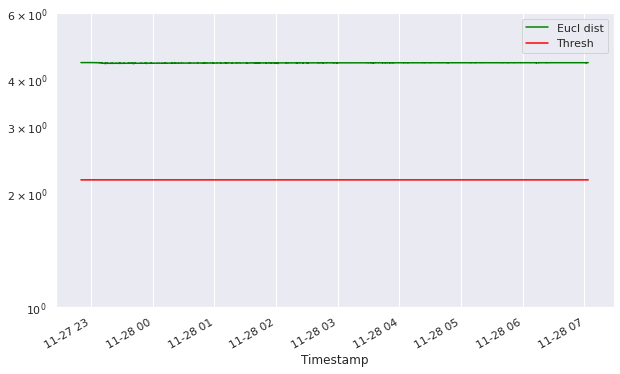

In [181]:
anomaly2.plot(logy=True, figsize = (10,6), ylim = [1,6], color = ['green','red'])
plt.savefig("PCA/Euclideandisttrainanomaly_3.png")
plt.close() 

<AxesSubplot:xlabel='Timestamp'>

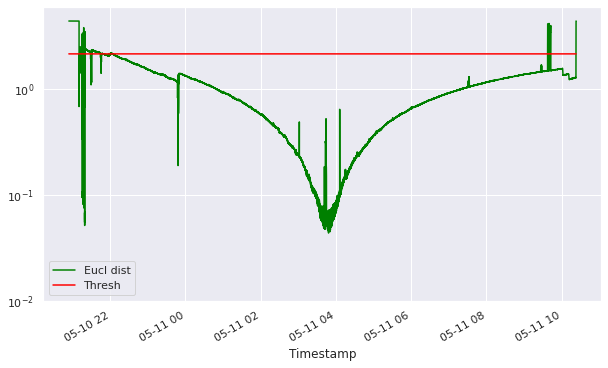

In [183]:
anomaly_train2.plot(logy=True, figsize = (10,6), ylim = [1e-2,6], color = ['green','red'])
plt.savefig("PCA/Euclideandisttestanomaly_3.png")
plt.close() 

In [214]:
#PCA model with Cosine Distance
distcostrain = CosineDist (data_train, mean_distr)
distcostest = CosineDist (data_test, mean_distr)
thresholdcos = MD_threshold(distcostrain, cosine = True)
print(thresholdcos)

1.461252976805941e-20


In [215]:
print(np.shape(distcostrain))
print(np.shape(distcostest))

(66599,)
(40598,)


In [216]:
distcostrain = distcostrain.squeeze()
distcostest = distcostest.squeeze()

<Figure size 432x288 with 0 Axes>

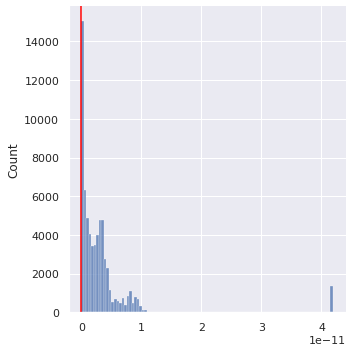

In [217]:
import seaborn as sns 
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
sns.displot(np.square(distcostrain),
             bins = 100, 
             kde= False);
plt.axvline(x=thresholdcos, color = 'red')
#plt.xlim([0.0,150])
plt.savefig("PCA/Cosinedisttrainerror_3.png")
plt.close() 

Text(0.5, 6.799999999999979, 'Cosine dist')

<Figure size 432x288 with 0 Axes>

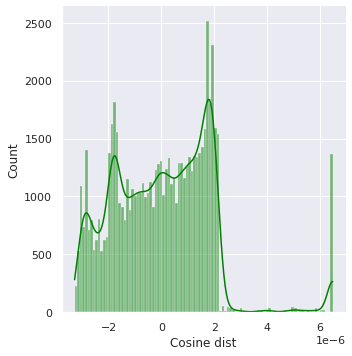

In [218]:
plt.figure()
sns.displot(distcostrain,bins = 100, kde= True, color = 'green');
#plt.xlim([0.0,15])
#plt.yscale('log')
plt.xlabel('Cosine dist')
#plt.axvline(x=thresholdcos, color = 'red')
plt.savefig("PCA/Cosinesdisttraindistribution_3.png")
plt.close() 

Text(0.5, 6.799999999999979, 'Cosine dist')

<Figure size 432x288 with 0 Axes>

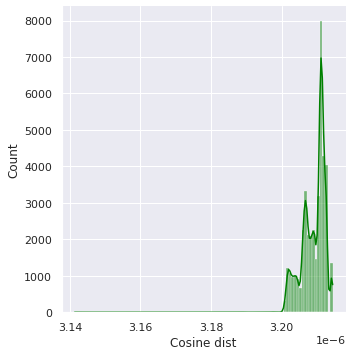

In [219]:
plt.figure()
sns.displot(distcostest,bins = 100, kde= True, color = 'green');
#plt.xlim([0.0,15])
#plt.yscale('log')
plt.xlabel('Cosine dist')
#plt.axvline(x=thresholdcos, color = 'red')
plt.savefig("PCA/Cosinesdisttestdistribution_3.png")
plt.close() 

In [220]:
print(np.shape(X_test_PCA))
print(np.shape(distcostest))

(40598, 48)
(40598,)


In [221]:
display(distcostrain)

array([6.47429836e-06, 6.47415713e-06, 6.47419583e-06, ...,
       6.47477868e-06, 6.47475923e-06, 6.47476747e-06])

In [222]:
np.shape(distcostrain)

(66599,)

In [223]:
anomaly_train3 = pd.DataFrame()
anomaly_train3['Cos dist']= distcostrain
anomaly_train3['Thresh'] = thresholdcos
# If Cosine dist above threshold: Flag as anomaly
anomaly_train3['Anomaly'] = anomaly_train3['Cos dist'] > anomaly_train3['Thresh']
anomaly_train3.index = X_train_PCA.index
anomaly3 = pd.DataFrame()
anomaly3['Cos dist']= distcostest
anomaly3['Thresh'] = thresholdcos
# If Mob dist above threshold: Flag as anomaly
anomaly3['Anomaly'] = anomaly3['Cos dist'] > anomaly3['Thresh']
anomaly3.index = X_test_PCA.index
anomaly3.head()

,Cos dist,Thresh,Anomaly
Timestamp,,,
2018-11-27 22:50:15+00:00,0.000003,1.461253e-20,True
2018-11-27 22:50:15+00:00,0.000003,1.461253e-20,True
2018-11-27 22:50:16+00:00,0.000003,1.461253e-20,True
2018-11-27 22:50:17+00:00,0.000003,1.461253e-20,True
2018-11-27 22:50:18+00:00,0.000003,1.461253e-20,True


In [224]:
anomaly_alldata3 = pd.concat([anomaly_train3, anomaly3])
anomaly_alldata3.to_csv('Anomaly_distanceCosine.csv')
#anomaly_alldata3.plot(logy=True, figsize = (10,6), ylim = [1e-21,1], color = ['green','red'])

<AxesSubplot:xlabel='Timestamp'>

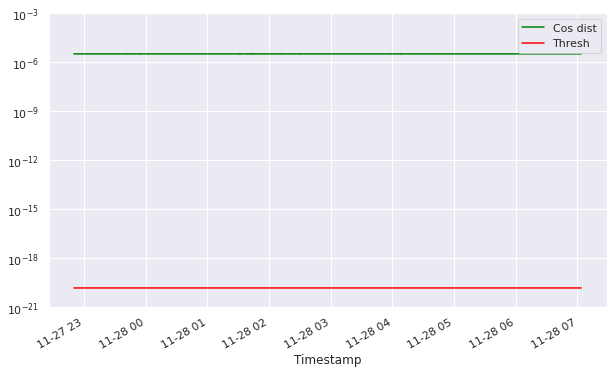

In [226]:
anomaly3.plot(logy=True, figsize = (10,6), ylim = [1e-22,1e-3], color = ['green','red'])
plt.savefig("PCA/Cosinedisttestanomaly_3.png")
plt.close() 

<AxesSubplot:xlabel='Timestamp'>

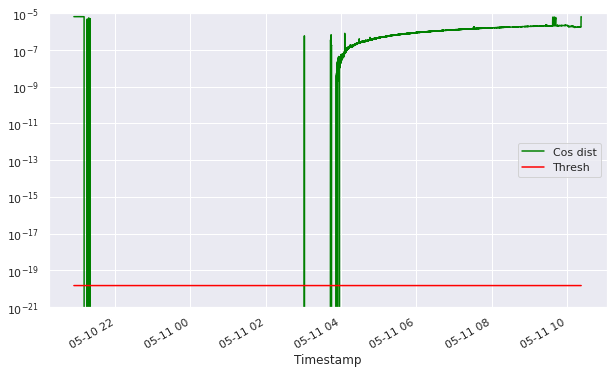

In [227]:
anomaly_train3.plot(logy=True, figsize = (10,6), ylim = [1e-40,1e-5], color = ['green','red'])
plt.savefig("PCA/Cosinedisttrainanomaly_3.png")
plt.close() 

In [192]:
#PCA model with ManhttanDistance
dist_trainManhattan = ManhattanDist (data_train, mean_distr)
dist_testManhattan = ManhattanDist (data_test, mean_distr)
thresholdManhattan = MD_threshold(dist_trainManhattan, manhattan = True)
print(thresholdManhattan)

2.3184345467790046


<Figure size 432x288 with 0 Axes>

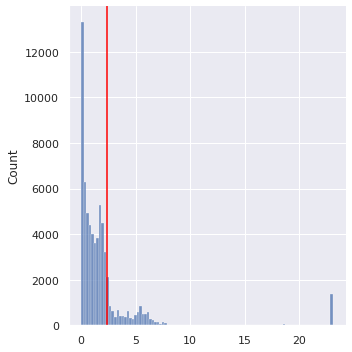

In [193]:
import seaborn as sns 
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
sns.displot(np.square(dist_trainManhattan),
             bins = 100, 
             kde= False);
plt.axvline(x=thresholdManhattan, color = 'red')
#plt.xlim([0.0,150])
plt.savefig("PCA/Manhattandisttrainerror_3.png")
plt.close() 

<Figure size 432x288 with 0 Axes>

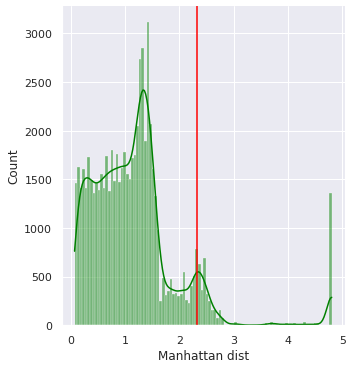

In [194]:
plt.figure()
sns.displot(dist_trainManhattan,bins = 100, kde= True, color = 'green');
#plt.xlim([0.0,15])
#plt.yscale('log')
plt.xlabel('Manhattan dist')
#plt.axvline(x=thresholdManhattan, color = 'red')
plt.savefig("PCA/Manhattandisttraindistribution_3.png")
plt.close() 

<Figure size 432x288 with 0 Axes>

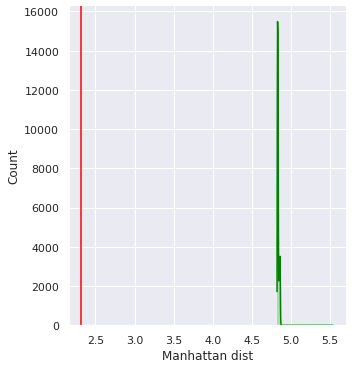

In [195]:
plt.figure()
sns.displot(dist_testManhattan,bins = 100, kde= True, color = 'green');
#plt.xlim([0.0,15])
#plt.yscale('log')
plt.xlabel('Manhattan dist')
#plt.axvline(x=thresholdManhattan, color = 'red')
plt.savefig("PCA/Manhattandisttestdistribution_3.png")
plt.close() 

In [196]:
anomaly_train4 = pd.DataFrame()
anomaly_train4['Manhattan dist']= dist_trainManhattan
anomaly_train4['Thresh'] = thresholdManhattan
# If Manhattan dist above threshold: Flag as anomaly
anomaly_train4['Anomaly'] = anomaly_train4['Manhattan dist'] > anomaly_train4['Thresh']
anomaly_train4.index = X_train_PCA.index
anomaly4 = pd.DataFrame()
anomaly4['Manhattan dist']= dist_testManhattan
anomaly4['Thresh'] = thresholdManhattan
# If Mob dist above threshold: Flag as anomaly
anomaly4['Anomaly'] = anomaly4['Manhattan dist'] > anomaly4['Thresh']
anomaly4.index = X_test_PCA.index
anomaly4.head()

,Manhattan dist,Thresh,Anomaly
Timestamp,,,
2018-11-27 22:50:15+00:00,4.825902,2.318435,True
2018-11-27 22:50:15+00:00,4.825513,2.318435,True
2018-11-27 22:50:16+00:00,4.825414,2.318435,True
2018-11-27 22:50:17+00:00,4.825389,2.318435,True
2018-11-27 22:50:18+00:00,4.825265,2.318435,True


In [197]:
anomaly_alldata4 = pd.concat([anomaly_train4, anomaly4])
anomaly_alldata4.to_csv('Anomaly_distanceManhattan.csv')
#anomaly_alldata4.plot(logy=True, figsize = (10,6), ylim = [1e-1,1e3], color = ['green','red'])

<AxesSubplot:xlabel='Timestamp'>

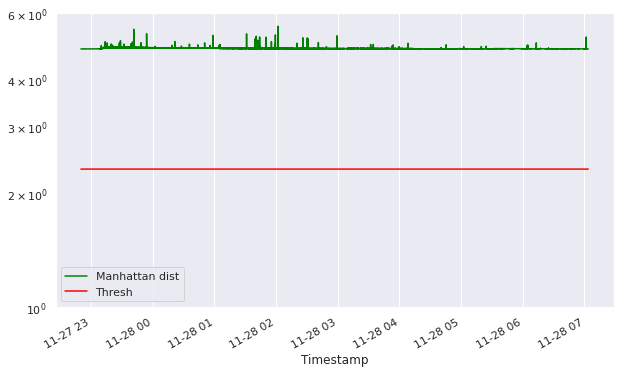

In [200]:
anomaly4.plot(logy=True, figsize = (10,6), ylim = [1,6], color = ['green','red'])
plt.savefig("PCA/Manhattandisttestanomaly_3.png")
plt.close() 

<AxesSubplot:xlabel='Timestamp'>

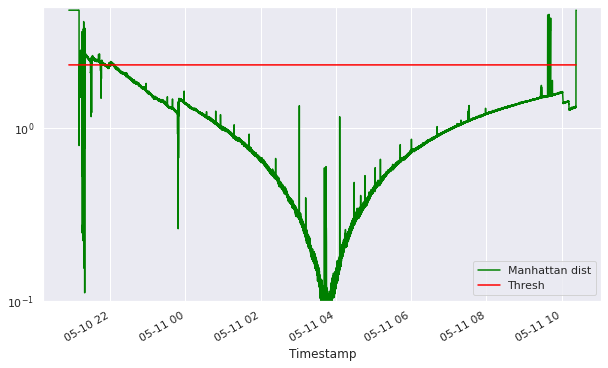

In [202]:
anomaly_train4.plot(logy=True, figsize = (10,6), ylim = [1e-1,5], color = ['green','red'])
plt.savefig("PCA/Manhattandisttrainanomaly_3}.png")
plt.close() 